# Importing all the important libraries and modules

In [332]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

# Importing and reading csv file

In [333]:
df=pd.read_csv("winequality-red.csv")
print(df.shape)
df.head()

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [334]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Checking for null values

In [336]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

No null values in entire dataset.

# Plotting histograms for dataset

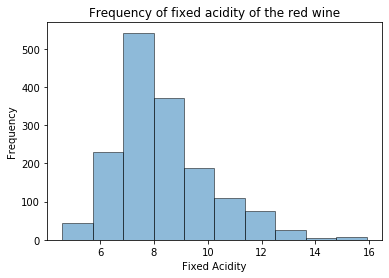

In [337]:
plt.hist(df['fixed acidity'],alpha=0.5,ec='black')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.title("Frequency of fixed acidity of the red wine")
plt.show()

From the above histogram we can say that most of the red wines have fixed acidity of between 7-8.

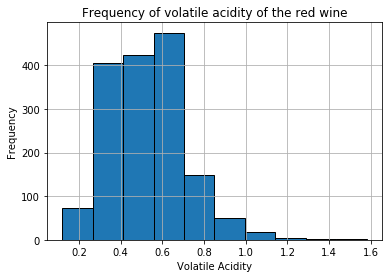

In [338]:
plt.grid()
plt.hist(df['volatile acidity'],ec='black')
plt.xlabel('Volatile Acidity')
plt.ylabel('Frequency')
plt.title("Frequency of volatile acidity of the red wine")
plt.show()

From the above histogram we can say that most of the red wines have volatile acidity of between (0.6-0.7),then between (0.4-0.5).

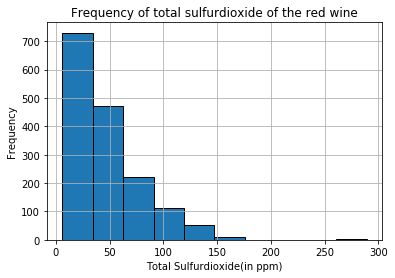

In [339]:
plt.grid()
plt.hist(df['total sulfur dioxide'],ec='black')
plt.xlabel('Total Sulfurdioxide(in ppm)')
plt.ylabel('Frequency')
plt.title("Frequency of total sulfurdioxide of the red wine")
plt.show()

From the above histogram we can say that most of the red wines have below 50-total sulfurdioxide(in ppm) in them.

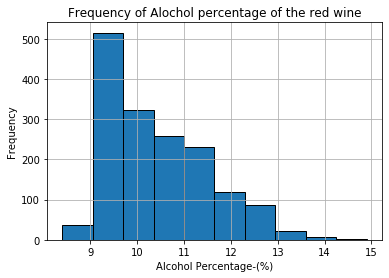

In [340]:
plt.grid()
plt.hist(df['alcohol'],ec='black')
plt.xlabel('Alcohol Percentage-(%)')
plt.ylabel('Frequency')
plt.title("Frequency of Alochol percentage of the red wine")
plt.show()

From the above histogram we can say that most of the red wines have alcohol percentage of (9-10)%

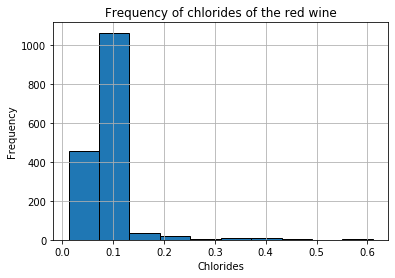

In [341]:
plt.grid()
plt.hist(df['chlorides'],ec='black')
plt.xlabel('Chlorides')
plt.ylabel('Frequency')
plt.title("Frequency of chlorides of the red wine")
plt.show()

From above histgram we can say that red wines have very low amount of chlorides in them.

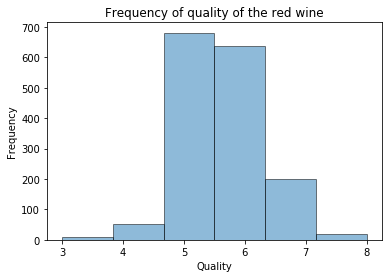

In [342]:
plt.hist(df['quality'],alpha=0.5,bins=6,ec='black')
plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title("Frequency of quality of the red wine")
plt.show()

From above histogram we see that average quality of red wine in the dataset is 5-7.

# Boxplots

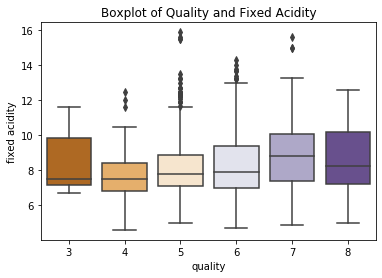

In [343]:
sns.boxplot(x=df['quality'],y=df['fixed acidity'],palette="PuOr")
plt.title("Boxplot of Quality and Fixed Acidity")
plt.show()

We can see that as there is light increase in Fixed acidity the quality of wine also gets better.

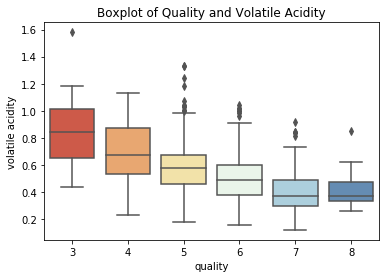

In [344]:
sns.boxplot(x=df['quality'],y=df['volatile acidity'],palette="RdYlBu")
plt.title("Boxplot of Quality and Volatile Acidity")
plt.show()

We can see that with decrease in volatile acidity there is increase in Quality of red wine.

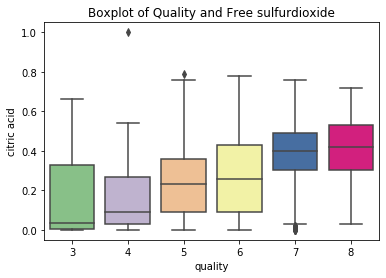

In [345]:
sns.boxplot(x=df['quality'],y=df['citric acid'],palette="Accent")
plt.title("Boxplot of Quality and Free sulfurdioxide")
plt.show()

As critic acid levels increases in redwine quality also increase.

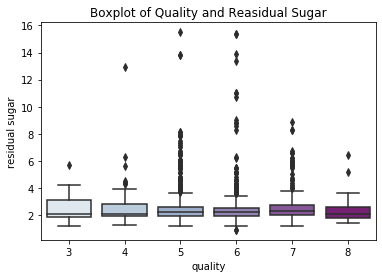

In [346]:
sns.boxplot(x=df['quality'],y=df['residual sugar'],palette="BuPu")
plt.title("Boxplot of Quality and Reasidual Sugar")
plt.show()

From above we can say that there is not much effect of the residual sugar on the quality of the wine.All qualities of red wines have more or less same amount of residual sugar.

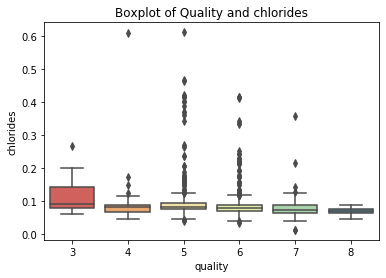

In [347]:
sns.boxplot(x=df['quality'],y=df['chlorides'],palette="Spectral")
plt.title("Boxplot of Quality and chlorides")
plt.show()

From above we can say that there is not much effect of the chlorides on the quality of the wine.All qualities of red wines have more or less same amount of chlorides in them.

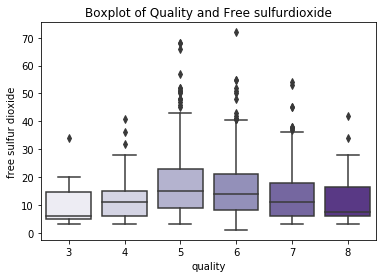

In [348]:
sns.boxplot(x=df['quality'],y=df['free sulfur dioxide'],palette="Purples")
plt.title("Boxplot of Quality and Free sulfurdioxide")
plt.show()

From above plot we see that there no much change in the free sulfurdioxide whatever be the quality.

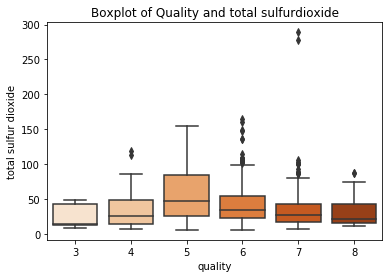

In [349]:
sns.boxplot(x=df['quality'],y=df['total sulfur dioxide'],palette='Oranges')
plt.title("Boxplot of Quality and total sulfurdioxide")
plt.show()

From above plot we see that there no much change in the total sulfurdioxide whatever be the quality.

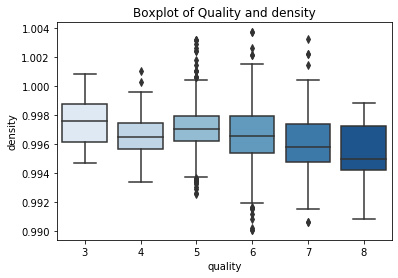

In [350]:
sns.boxplot(x=df['quality'],y=df['density'],palette='Blues')
plt.title("Boxplot of Quality and density")
plt.show()

We see that high quality wines have less density when compared.

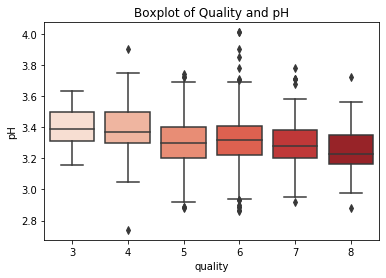

In [351]:
sns.boxplot(x=df['quality'],y=df['pH'],palette='Reds')
plt.title("Boxplot of Quality and pH")
plt.show()

We see that with slight decrease in pH there is increase in Quality

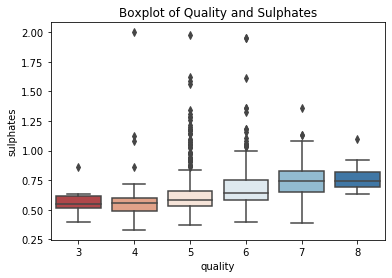

In [352]:
sns.boxplot(x=df['quality'],y=df['sulphates'],palette='RdBu')
plt.title("Boxplot of Quality and Sulphates")
plt.show()

We see that with increase in sulphates there is increase in quality

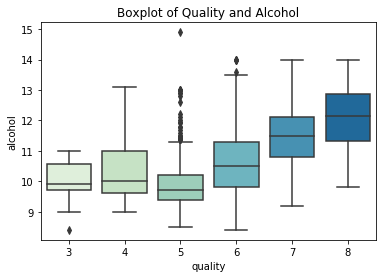

In [353]:
sns.boxplot(x=df['quality'],y=df['alcohol'],palette="GnBu")
plt.title("Boxplot of Quality and Alcohol")
plt.show()

The above plot shows the increase in the quality of wine with the increase in alcohol. The quality of the wine is directly related to the amount of alcohol in the wine. More the alcohol in the wine better will be the quality.

# ScatterPlots

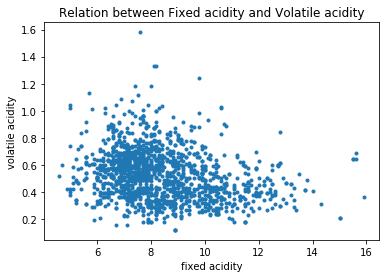

In [354]:
x=df['fixed acidity']
y=df['volatile acidity']
plt.plot(x,y,marker='.',linestyle='none')
plt.ylabel('volatile acidity')
plt.xlabel('fixed acidity')
plt.title('Relation between Fixed acidity and Volatile acidity')
plt.show()

We can see that with increase in fixed acidity there in not much increase in volatile acidity

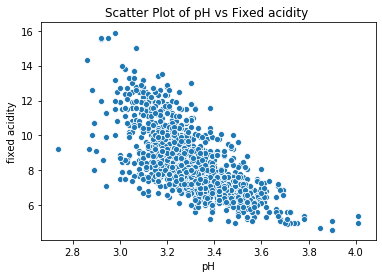

In [355]:
sns.scatterplot(x='pH', y='fixed acidity',data=df)
plt.title("Scatter Plot of pH vs Fixed acidity ")
plt.show()

We see that there is negative correlation between pH and fixed acidity.

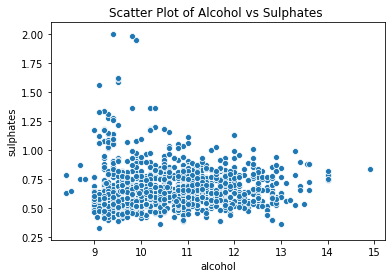

In [356]:
sns.scatterplot(x='alcohol', y='sulphates',data=df)
plt.title("Scatter Plot of Alcohol vs Sulphates ")
plt.show()

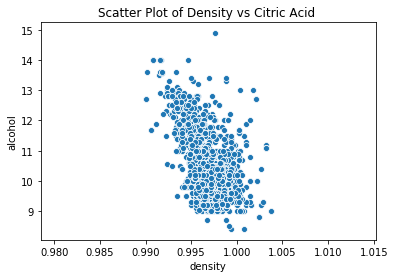

In [357]:
sns.scatterplot(x='density', y='alcohol',data=df)
plt.title("Scatter Plot of Density vs Citric Acid ")
plt.show()

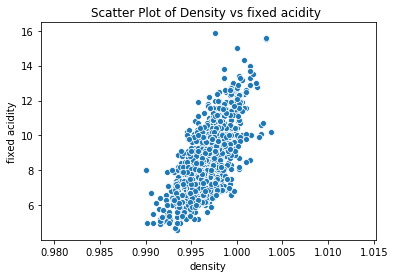

In [358]:
sns.scatterplot(x='density', y='fixed acidity',data=df)
plt.title("Scatter Plot of Density vs fixed acidity ")
plt.show()

There is positive correlation between Density and fixed acity.

# Scatter Matrix

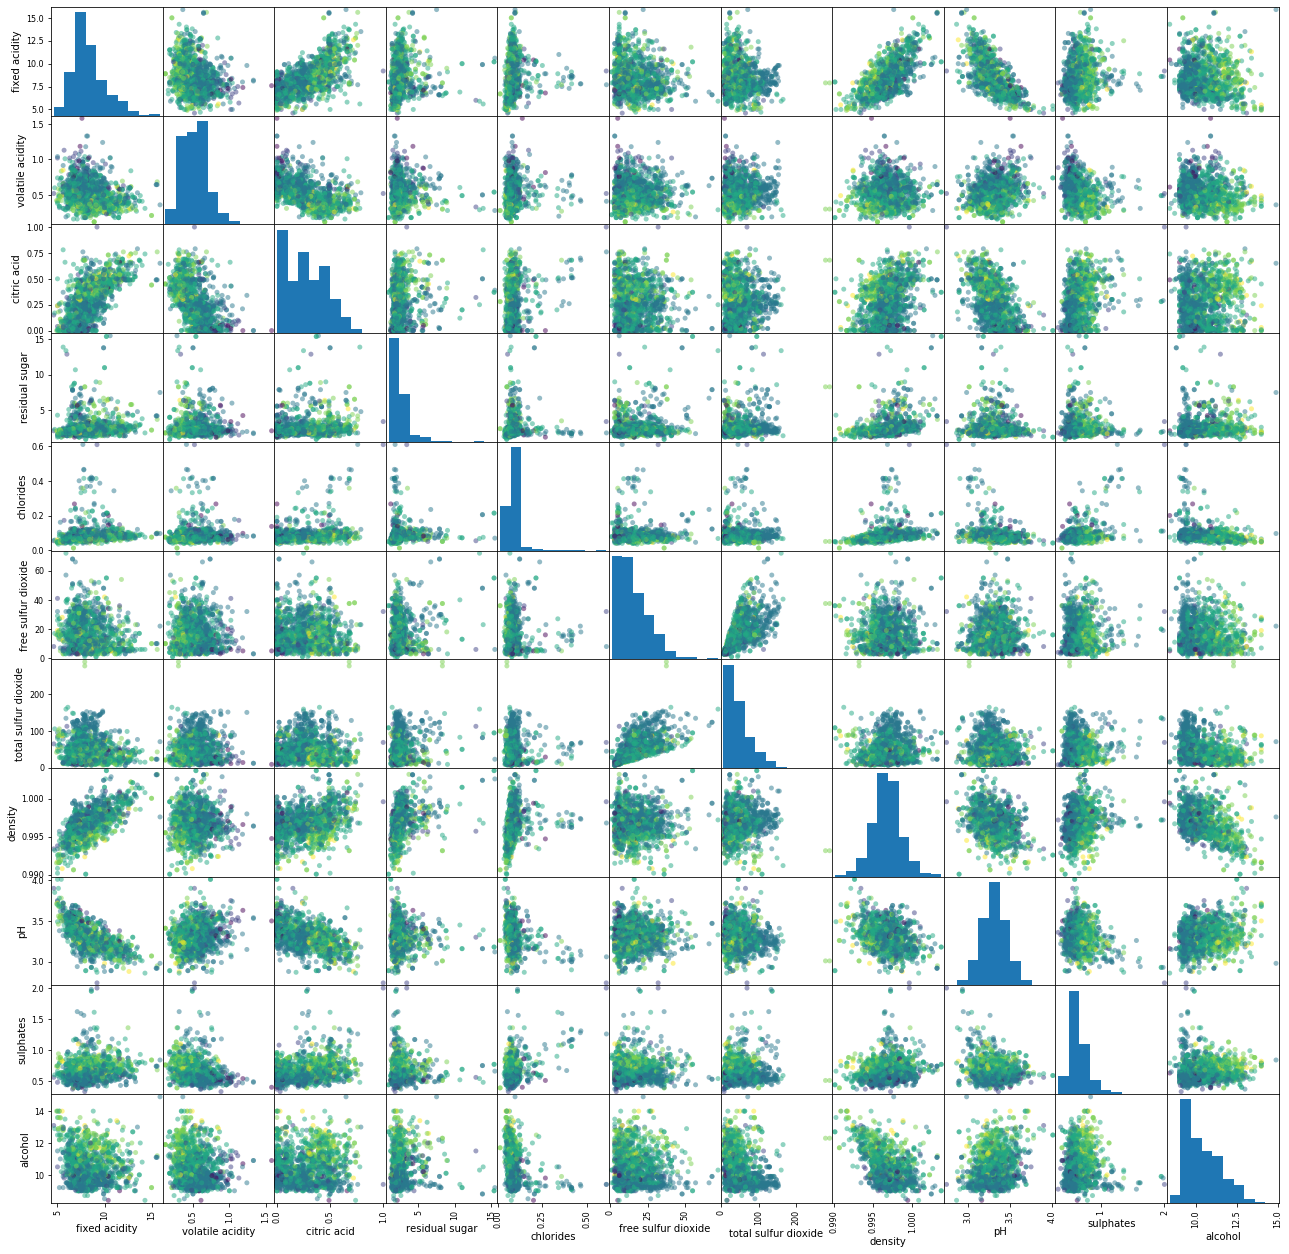

In [359]:
_=pd.plotting.scatter_matrix(df.drop(['quality'],axis=1),c=df['quality'],alpha=0.5,figsize=[22,22],s=100)

# Data Modelling

In [360]:
x=df.drop(['quality','residual sugar','total sulfur dioxide','free sulfur dioxide','chlorides'],axis=1)
type(x)

pandas.core.frame.DataFrame

In [361]:
y=df['quality']
type(y)

pandas.core.series.Series

# Training and splitting data

In [362]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=50,stratify=y)

# KNN Classifiaction

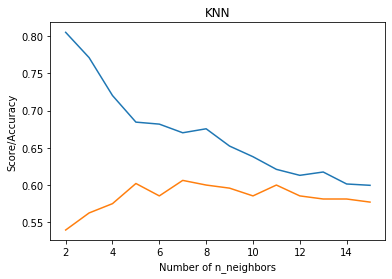

In [363]:
train=[]
test=[]
k=[2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in range(2,16):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    knn.predict(x_test)
    train.append(knn.score(x_train,y_train))
    test.append(knn.score(x_test,y_test))
plt.plot(k,train,label="Train")
plt.plot(k,test,label="test")
plt.title("KNN")
plt.xlabel('Number of n_neighbors')
plt.ylabel('Score/Accuracy')
plt.show()

Did the accuracy plot againsr neighbors to see how the accuracy of knn changed for different number of neighbors.

In [364]:
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

Done cross-checking and found that highest accuracy for the model was at n_neighbors=7.

# Prediction on KNN

In [365]:
knn.score(x_test,y_test)

0.60625

The accuracy of the above KNN model is 60.625%

In [366]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   2,   1,   0,   0],
       [  0,   0,  11,   5,   0,   0],
       [  0,   0, 153,  50,   1,   0],
       [  0,   0,  66, 121,   5,   0],
       [  0,   0,   2,  46,  12,   0],
       [  0,   0,   0,   2,   3,   0]])

The confusion matrix for knn model

In [367]:
Report=classification_report(y_test,y_pred,zero_division=1)
print(Report)

              precision    recall  f1-score   support

           3       1.00      0.00      0.00         3
           4       1.00      0.00      0.00        16
           5       0.65      0.75      0.70       204
           6       0.54      0.63      0.58       192
           7       0.57      0.20      0.30        60
           8       1.00      0.00      0.00         5

    accuracy                           0.60       480
   macro avg       0.79      0.26      0.26       480
weighted avg       0.61      0.60      0.57       480



In [368]:
c=cross_val_score(knn,x,y,cv=10)
print('Cross validation score:',c.mean())

Cross validation score: 0.5434512578616352


Accuracy for knn model with cross_validation(where scoring='accuracy') is 54.3451%.
.
.


We see that the accuracy of the above model is not that high as we used accuracy,f1-score as they are used for binary classification problems.

For multi-classification to check or visualize the performance of model we use rog_auc(Area Under ROC Curve).

In [369]:
cc = cross_val_score(knn, x , y, scoring = 'roc_auc_ovr',cv=10)
print('Cross validation score with roc_auc',cc.mean())

Cross validation score with roc_auc 0.6763592116424247


# Logistic Regression

As we saw that the given dataset is not binary classification problem.Its multi-class problem,so I used multi-classification algorithm.

In [370]:
logreg = LogisticRegression(multi_class='multinomial',solver ='newton-cg')
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [371]:
y_pred = logreg.predict(x_test)

In [372]:
logreg.score(x_test,y_test)

0.5958333333333333

The accuracy of above logistic regression model is 59.5833%.

In [373]:
print(classification_report(y_test, y_pred, digits=3, zero_division = 1))

              precision    recall  f1-score   support

           3      1.000     0.000     0.000         3
           4      1.000     0.000     0.000        16
           5      0.654     0.750     0.699       204
           6      0.538     0.630     0.580       192
           7      0.571     0.200     0.296        60
           8      1.000     0.000     0.000         5

    accuracy                          0.596       480
   macro avg      0.794     0.263     0.263       480
weighted avg      0.614     0.596     0.566       480



In [374]:
a = cross_val_score(logreg, x , y, cv=10)
print('Cross validation score :',a.mean())

Cross validation score : 0.5716077044025156


We see that the accuracy of the above model is not that high as we used accuracy,f1-score as they are used for binary classification problems.

For multi-classification to check or visualize the performance of model we use rog_auc(Area Under ROC Curve).

In [375]:
ac = cross_val_score(logreg, x , y, scoring = 'roc_auc_ovr',cv=10)
print('Cross validation score with roc_auc',ac.mean())

Cross validation score with roc_auc 0.785696813990418
